In [1]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
from astropy.cosmology import Planck18
import matplotlib.pyplot as plt

# Load data from dates.hdf5 and use only targetid’s with zwarn=0

In [2]:
f = h5py.File('/global/u1/z/zhaozhon/Dataset/dates.hdf5')
for name in f['df']:
    print(name)
print('//////////')
for name in f['df']['block0_items']:
    print(name)
print('//////////')
for name in f['df']['block1_items']:
    print(name)
print('//////////')

axis0
axis1
block0_items
block0_values
block1_items
block1_values
//////////
b'mjd'
b'z'
b'zerr'
b'zwarn'
//////////
b'targetid'
b'night'
//////////


In [3]:
mjd = np.array(f['df']['block0_values'][:,0])
z = np.array(f['df']['block0_values'][:,1])
zerr = np.array(f['df']['block0_values'][:,2])
zwarn = np.array(f['df']['block0_values'][:,3])
targetid = np.array(f['df']['block1_values'][:,0])
night = np.array(f['df']['block1_values'][:,1])

In [4]:
#Use only targetid’s with zwarn=0
index = (zwarn == 0)
mjd_sld = mjd[index]
z_sld = z[index]
zerr_sld = zerr[index]
zwarn_sld = zwarn[index]
targetid_sld = targetid[index]
night_sld = night[index]
d = Planck18.distmod(z_sld).value
derr = (Planck18.distmod(z_sld+zerr_sld).value-Planck18.distmod(z_sld-zerr_sld).value)/2

In [24]:
print(d)

[47.08903366 45.36871656 45.572788   ... 46.12057855 45.99834053
 43.30988493]


# Load data from lc foler and and reject datas that have a problem

In [5]:
data_g = np.genfromtxt('/global/u1/z/zhaozhon/Dataset/g.csv', delimiter=',', skip_header=1)
target_id_g = data_g[:,0]
target_id_g = np.array([int(x) for x in target_id_g])
mjd_g = data_g[:,1]
mag_g = data_g[:,2]
magerr_g = data_g[:,3]
data_r = np.genfromtxt('/global/u1/z/zhaozhon/Dataset/r.csv', delimiter=',', skip_header=1)
target_id_r = data_r[:,0]
target_id_r = np.array([int(x) for x in target_id_r])
mjd_r = data_r[:,1]
mag_r = data_r[:,2]
magerr_r = data_r[:,3]
data_i = np.genfromtxt('/global/u1/z/zhaozhon/Dataset/i.csv', delimiter=',', skip_header=1)
target_id_i = data_i[:,0]
target_id_i = np.array([int(x) for x in target_id_i])
mjd_i = data_i[:,1]
mag_i = data_i[:,2]
magerr_i = data_i[:,3]

# Each Band is independent of others

# Plot magnitude with uncertainty along the time baseline

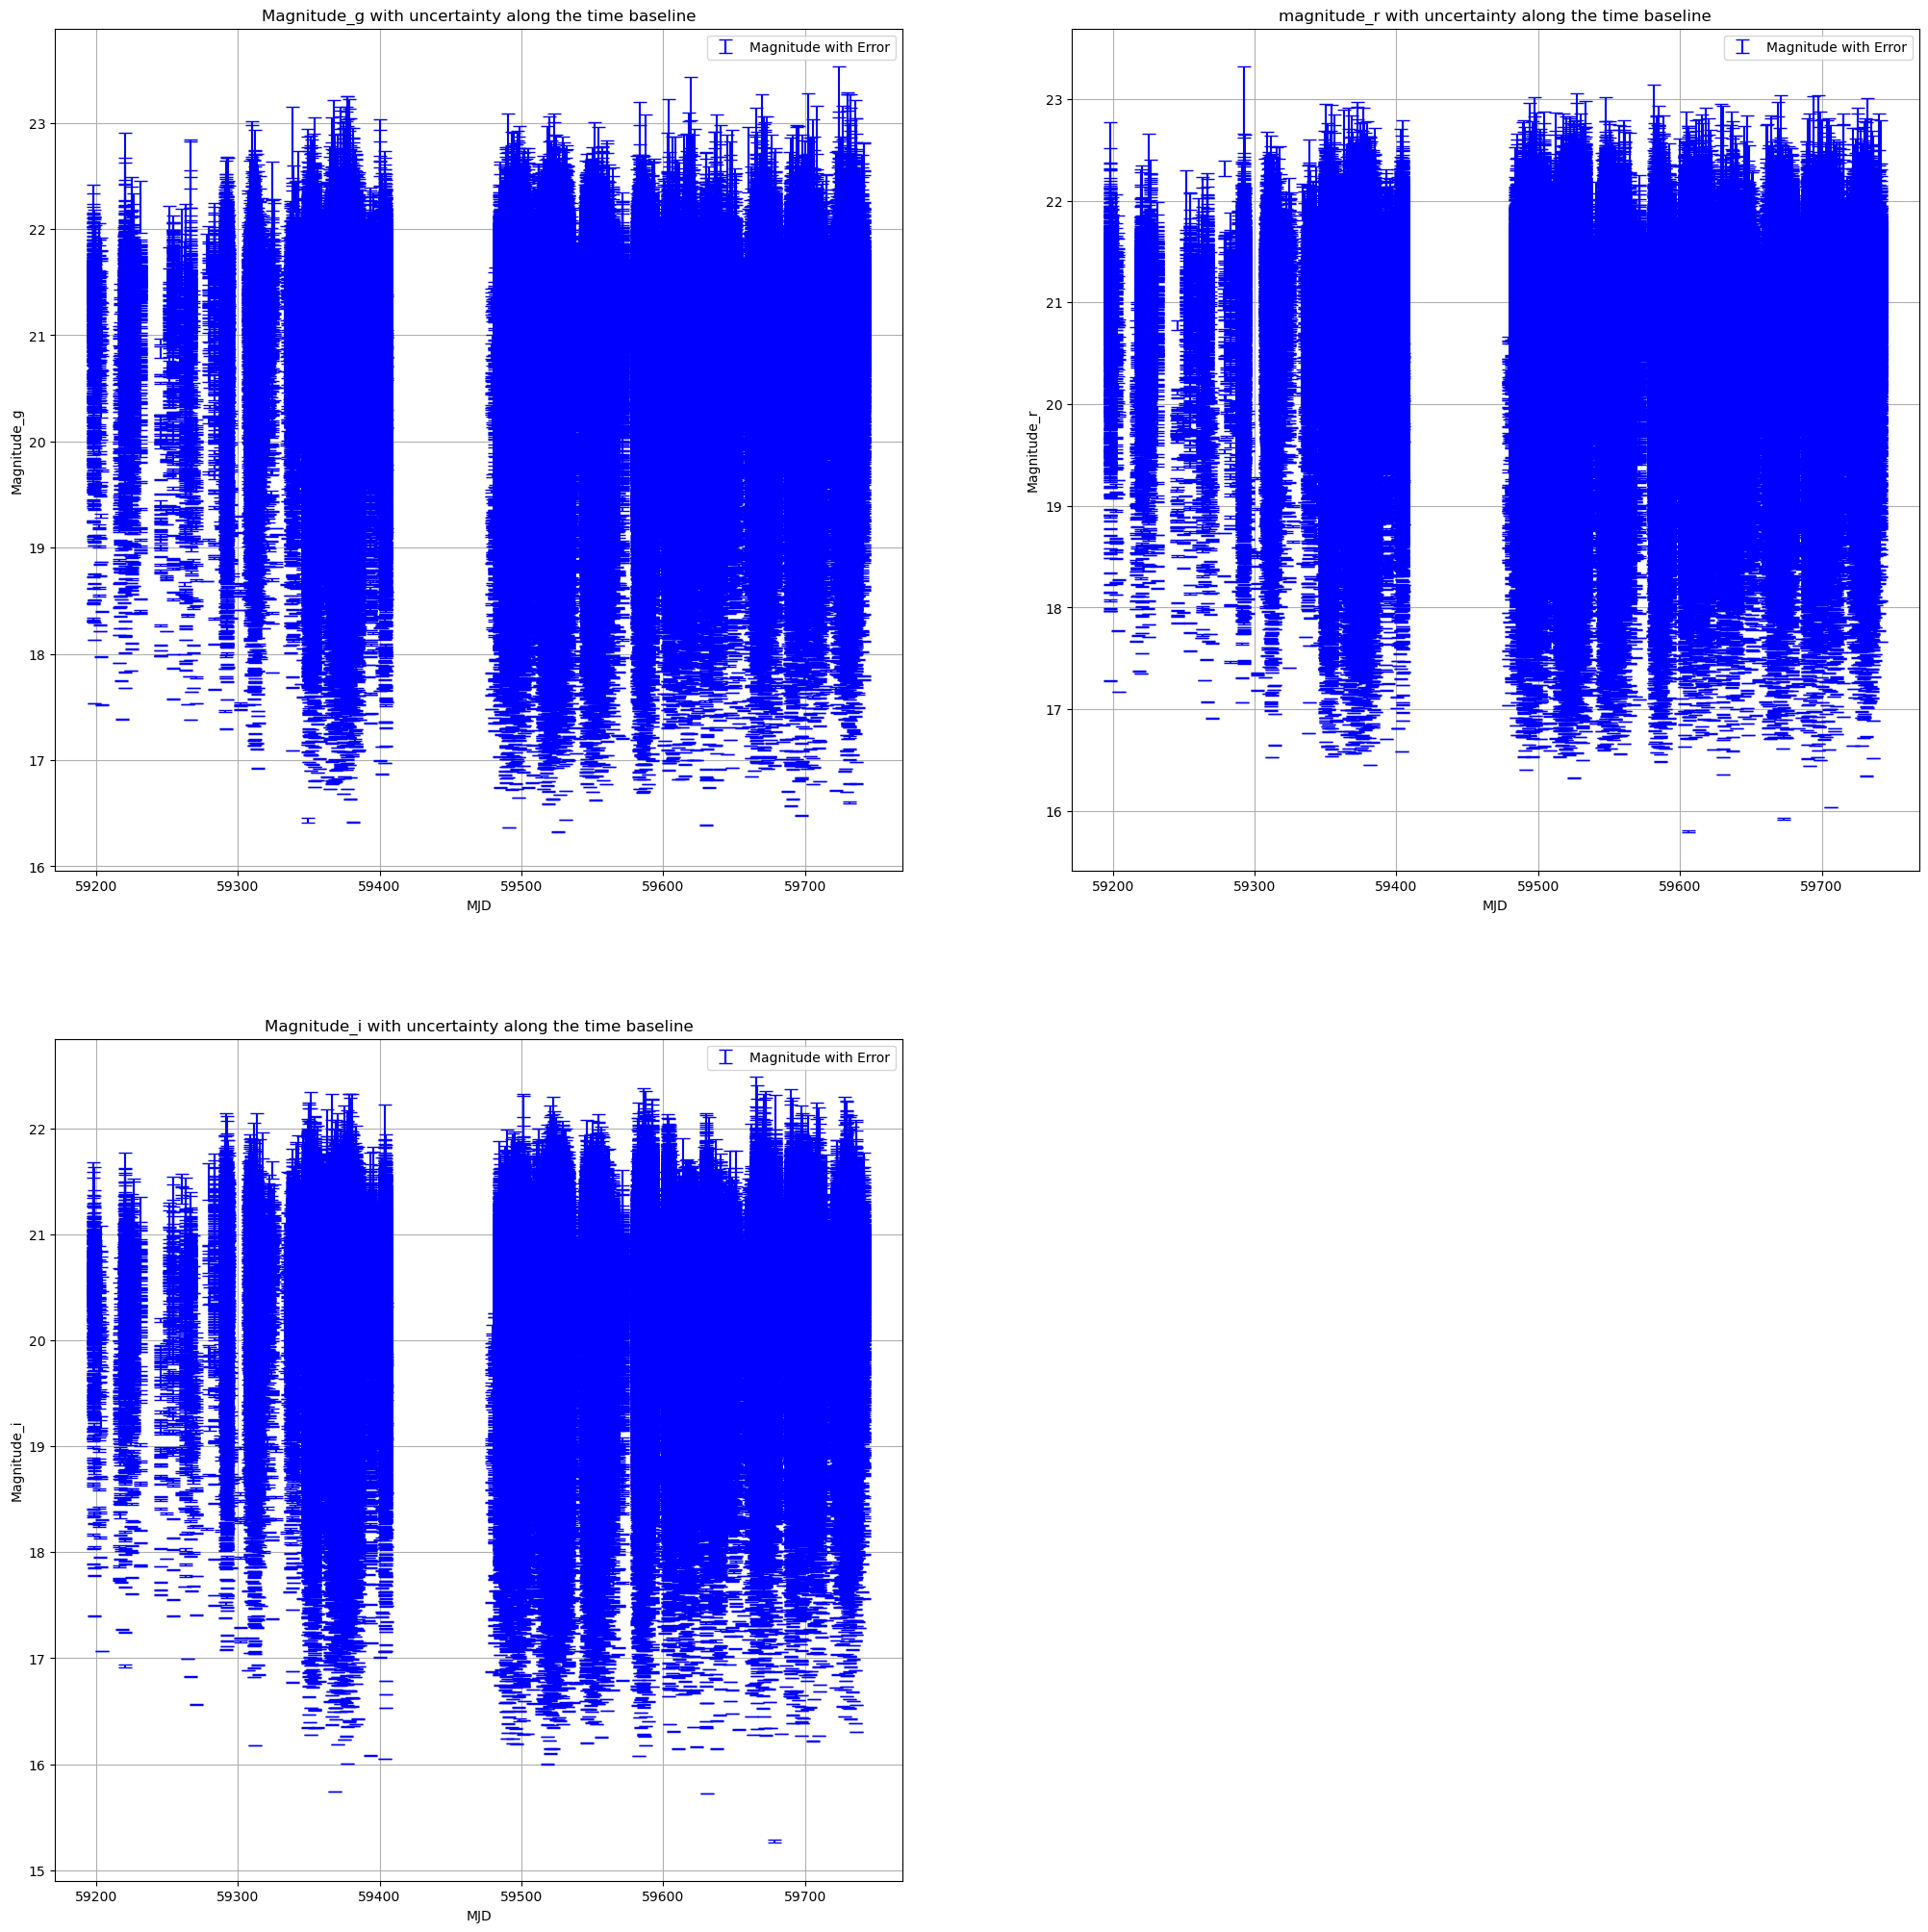

In [6]:
sorted_indices = np.argsort(mjd_g)
sorted_mjd_g = mjd_g[sorted_indices]
sorted_mag_g = mag_g[sorted_indices]
sorted_magerr_g = magerr_g[sorted_indices]
plt.figure(figsize=(25, 25))
# Create the scatter plot with error bars
plt.subplot(221)
plt.errorbar(sorted_mjd_g, sorted_mag_g, yerr=np.abs(sorted_magerr_g), fmt='o', color='blue', capsize=5, markersize=0.01, label='Magnitude with Error')
# Customize plot labels and appearance
plt.xlabel('MJD')
plt.ylabel('Magnitude_g')
plt.title('Magnitude_g with uncertainty along the time baseline')
plt.legend()

# Show the plot
plt.grid(True)

sorted_indices = np.argsort(mjd_r)
sorted_mjd_r = mjd_r[sorted_indices]
sorted_mag_r = mag_r[sorted_indices]
sorted_magerr_r = magerr_r[sorted_indices]

# Create the scatter plot with error bars
plt.subplot(222)
plt.errorbar(sorted_mjd_r, sorted_mag_r, yerr=np.abs(sorted_magerr_r), fmt='o', color='blue', capsize=5, markersize=0.01, label='Magnitude with Error')
# Customize plot labels and appearance
plt.xlabel('MJD')
plt.ylabel('Magnitude_r')
plt.title('magnitude_r with uncertainty along the time baseline')
plt.legend()

# Show the plot
plt.grid(True)
sorted_indices = np.argsort(mjd_i)
sorted_mjd_i = mjd_i[sorted_indices]
sorted_mag_i = mag_i[sorted_indices]
sorted_magerr_i = magerr_i[sorted_indices]

# Create the scatter plot with error bars
plt.subplot(223)

plt.errorbar(sorted_mjd_i, sorted_mag_i, yerr=np.abs(sorted_magerr_i), fmt='o', color='blue', capsize=5, markersize=0.01, label='Magnitude with Error')
# Customize plot labels and appearance
plt.xlabel('MJD')
plt.ylabel('Magnitude_i')
plt.title('Magnitude_i with uncertainty along the time baseline')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Plot the distribution of magnitude and uncertainty

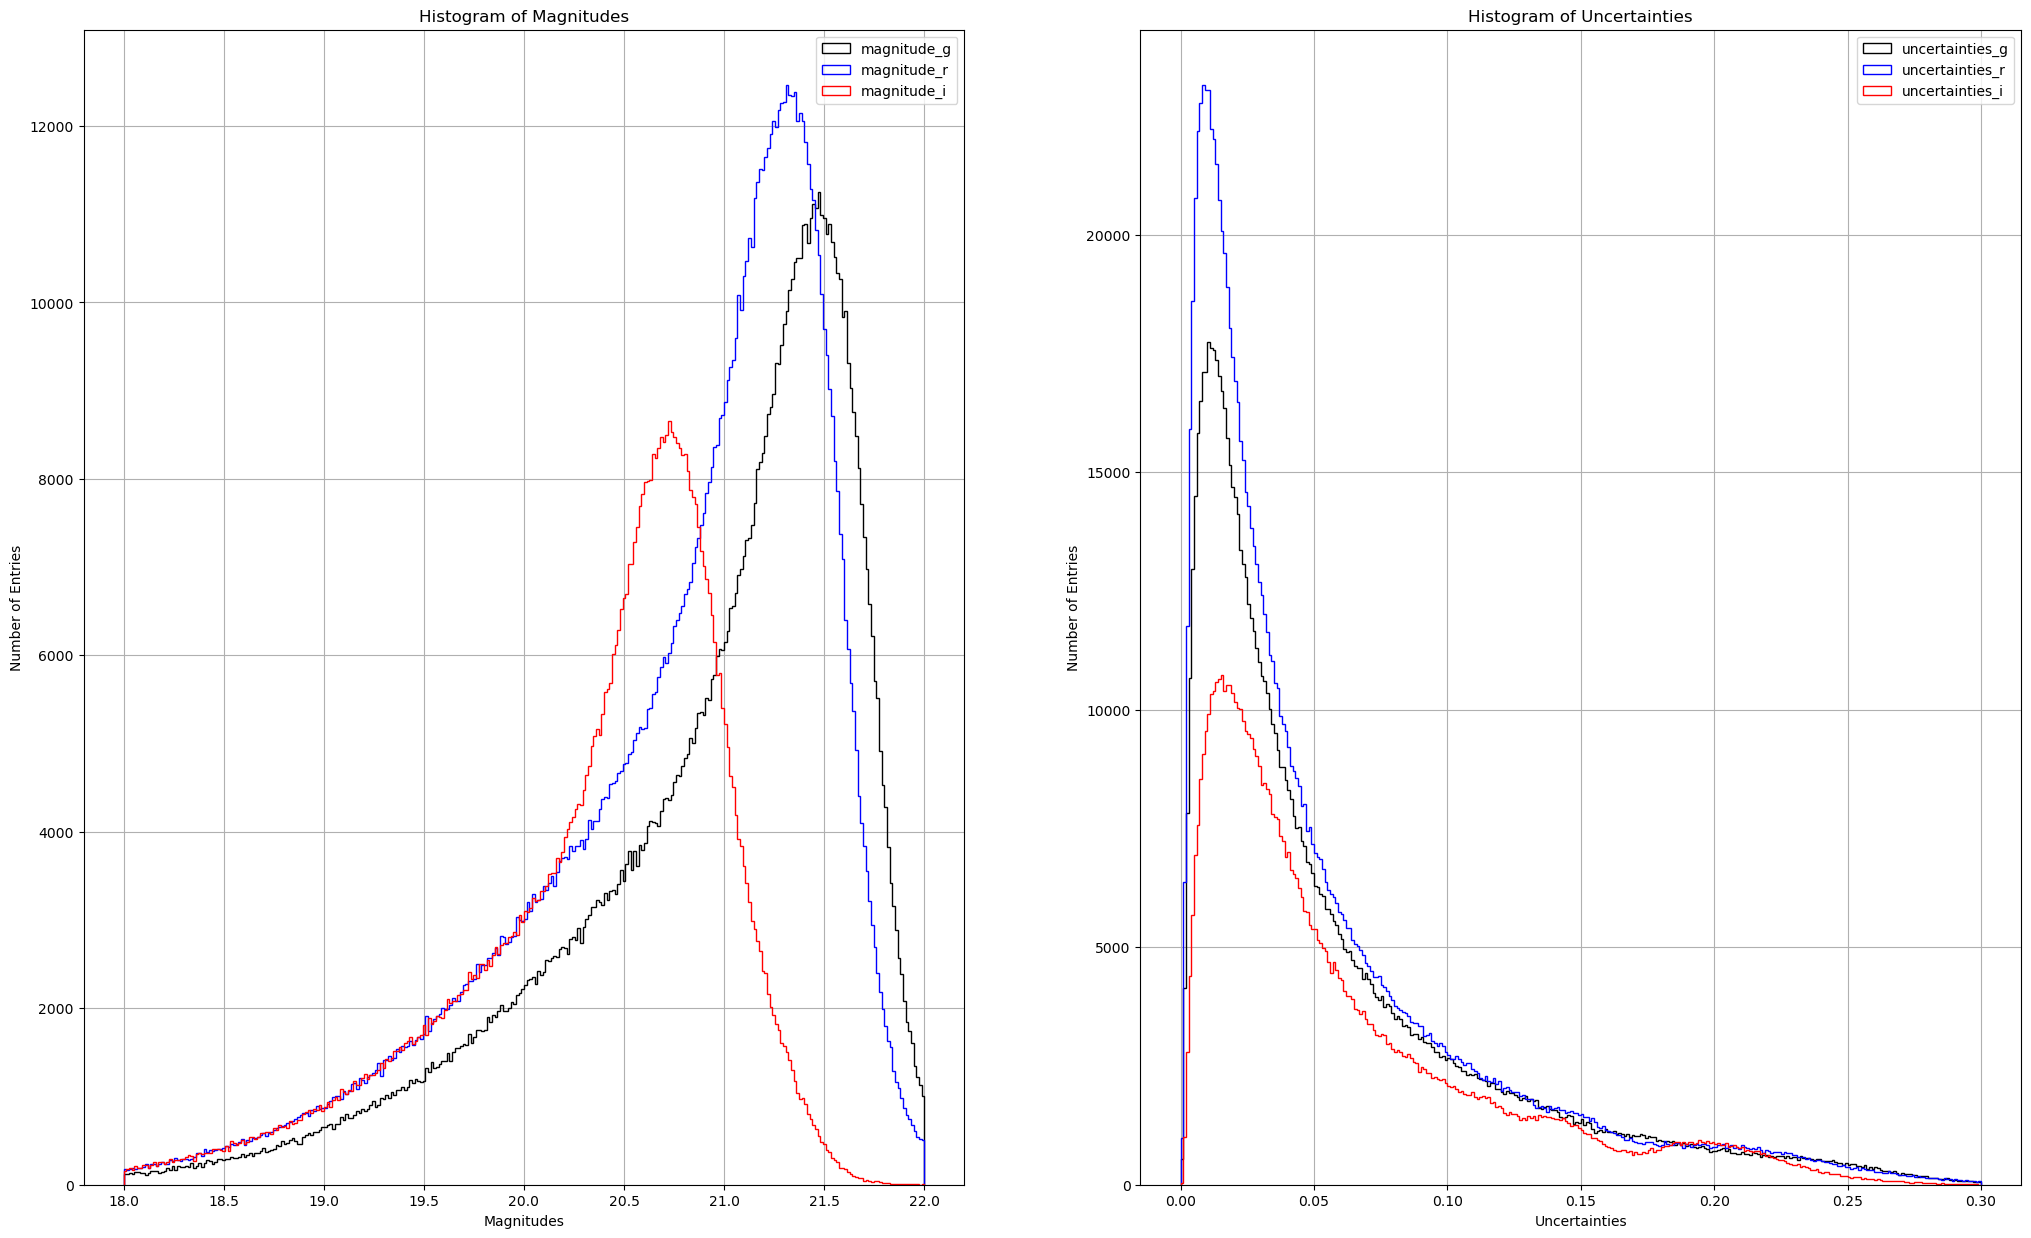

In [7]:
plt.figure(figsize=(25, 15))
plt.subplot(121)
# Create the histogram without filling the bars (histtype='step')
plt.hist(mag_g, bins=300, range=(18, 22), histtype='step', color='black', label='magnitude_g', alpha=1)
plt.hist(mag_r, bins=300, range=(18, 22), histtype='step', color='blue', label='magnitude_r', alpha=1)
plt.hist(mag_i, bins=300, range=(18, 22), histtype='step', color='red', label='magnitude_i', alpha=1)
# Customize plot labels and appearance
plt.xlabel('Magnitudes')
plt.ylabel('Number of Entries')
plt.title('Histogram of Magnitudes')
plt.legend()

# Show the plot
plt.grid(True)

plt.subplot(122)
# Create the histogram without filling the bars (histtype='step')
plt.hist(magerr_g, bins=300, range=(0, 0.3), histtype='step', color='black', label='uncertainties_g', alpha=1)
plt.hist(magerr_r, bins=300, range=(0, 0.3), histtype='step', color='blue', label='uncertainties_r', alpha=1)
plt.hist(magerr_i, bins=300, range=(0, 0.3), histtype='step', color='red', label='uncertainties_i', alpha=1)
# Customize plot labels and appearance
plt.xlabel('Uncertainties')
plt.ylabel('Number of Entries')
plt.title('Histogram of Uncertainties')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Plot the histogram of uncertainties for different time windows,set the mean of mjd as the DESI observation time

In [8]:
mjd_g_mean = np.mean(mjd_g)
mjd_r_mean = np.mean(mjd_r)
mjd_i_mean = np.mean(mjd_i)
def time_window_g(mjd,window,magerr):
    start = mjd_g_mean - window / 2
    end = mjd_g_mean + window / 2
    indices_g = (mjd >= start) & (mjd <= end)
    
    magerr_g_within_window = magerr[indices_g]
    
    return magerr_g_within_window
def time_window_r(mjd,window,magerr):
    start = mjd_r_mean - window / 2
    end = mjd_r_mean + window / 2
    indices_r = (mjd >= start) & (mjd <= end)
    
    magerr_r_within_window = magerr[indices_r]
    
    return magerr_r_within_window
def time_window_i(mjd,window,magerr):
    start = mjd_i_mean - window / 2
    end = mjd_i_mean + window / 2
    indices_i = (mjd >= start) & (mjd <= end)
    
    magerr_i_within_window = magerr[indices_i]
    
    return magerr_i_within_window

In [9]:
magerr_g_within_700 = time_window_g(mjd_g,700,magerr_g)
magerr_g_within_300 = time_window_g(mjd_g,300,magerr_g)
magerr_g_within_100 = time_window_g(mjd_g,100,magerr_g)
magerr_g_within_50 = time_window_g(mjd_g,50,magerr_g)

magerr_r_within_700 = time_window_r(mjd_r,700,magerr_r)
magerr_r_within_300 = time_window_r(mjd_r,300,magerr_r)
magerr_r_within_100 = time_window_r(mjd_r,100,magerr_r)
magerr_r_within_50 = time_window_r(mjd_r,50,magerr_r)

magerr_i_within_700 = time_window_i(mjd_i,700,magerr_i)
magerr_i_within_300 = time_window_i(mjd_i,300,magerr_i)
magerr_i_within_100 = time_window_i(mjd_i,100,magerr_i)
magerr_i_within_50 = time_window_i(mjd_i,50,magerr_i)

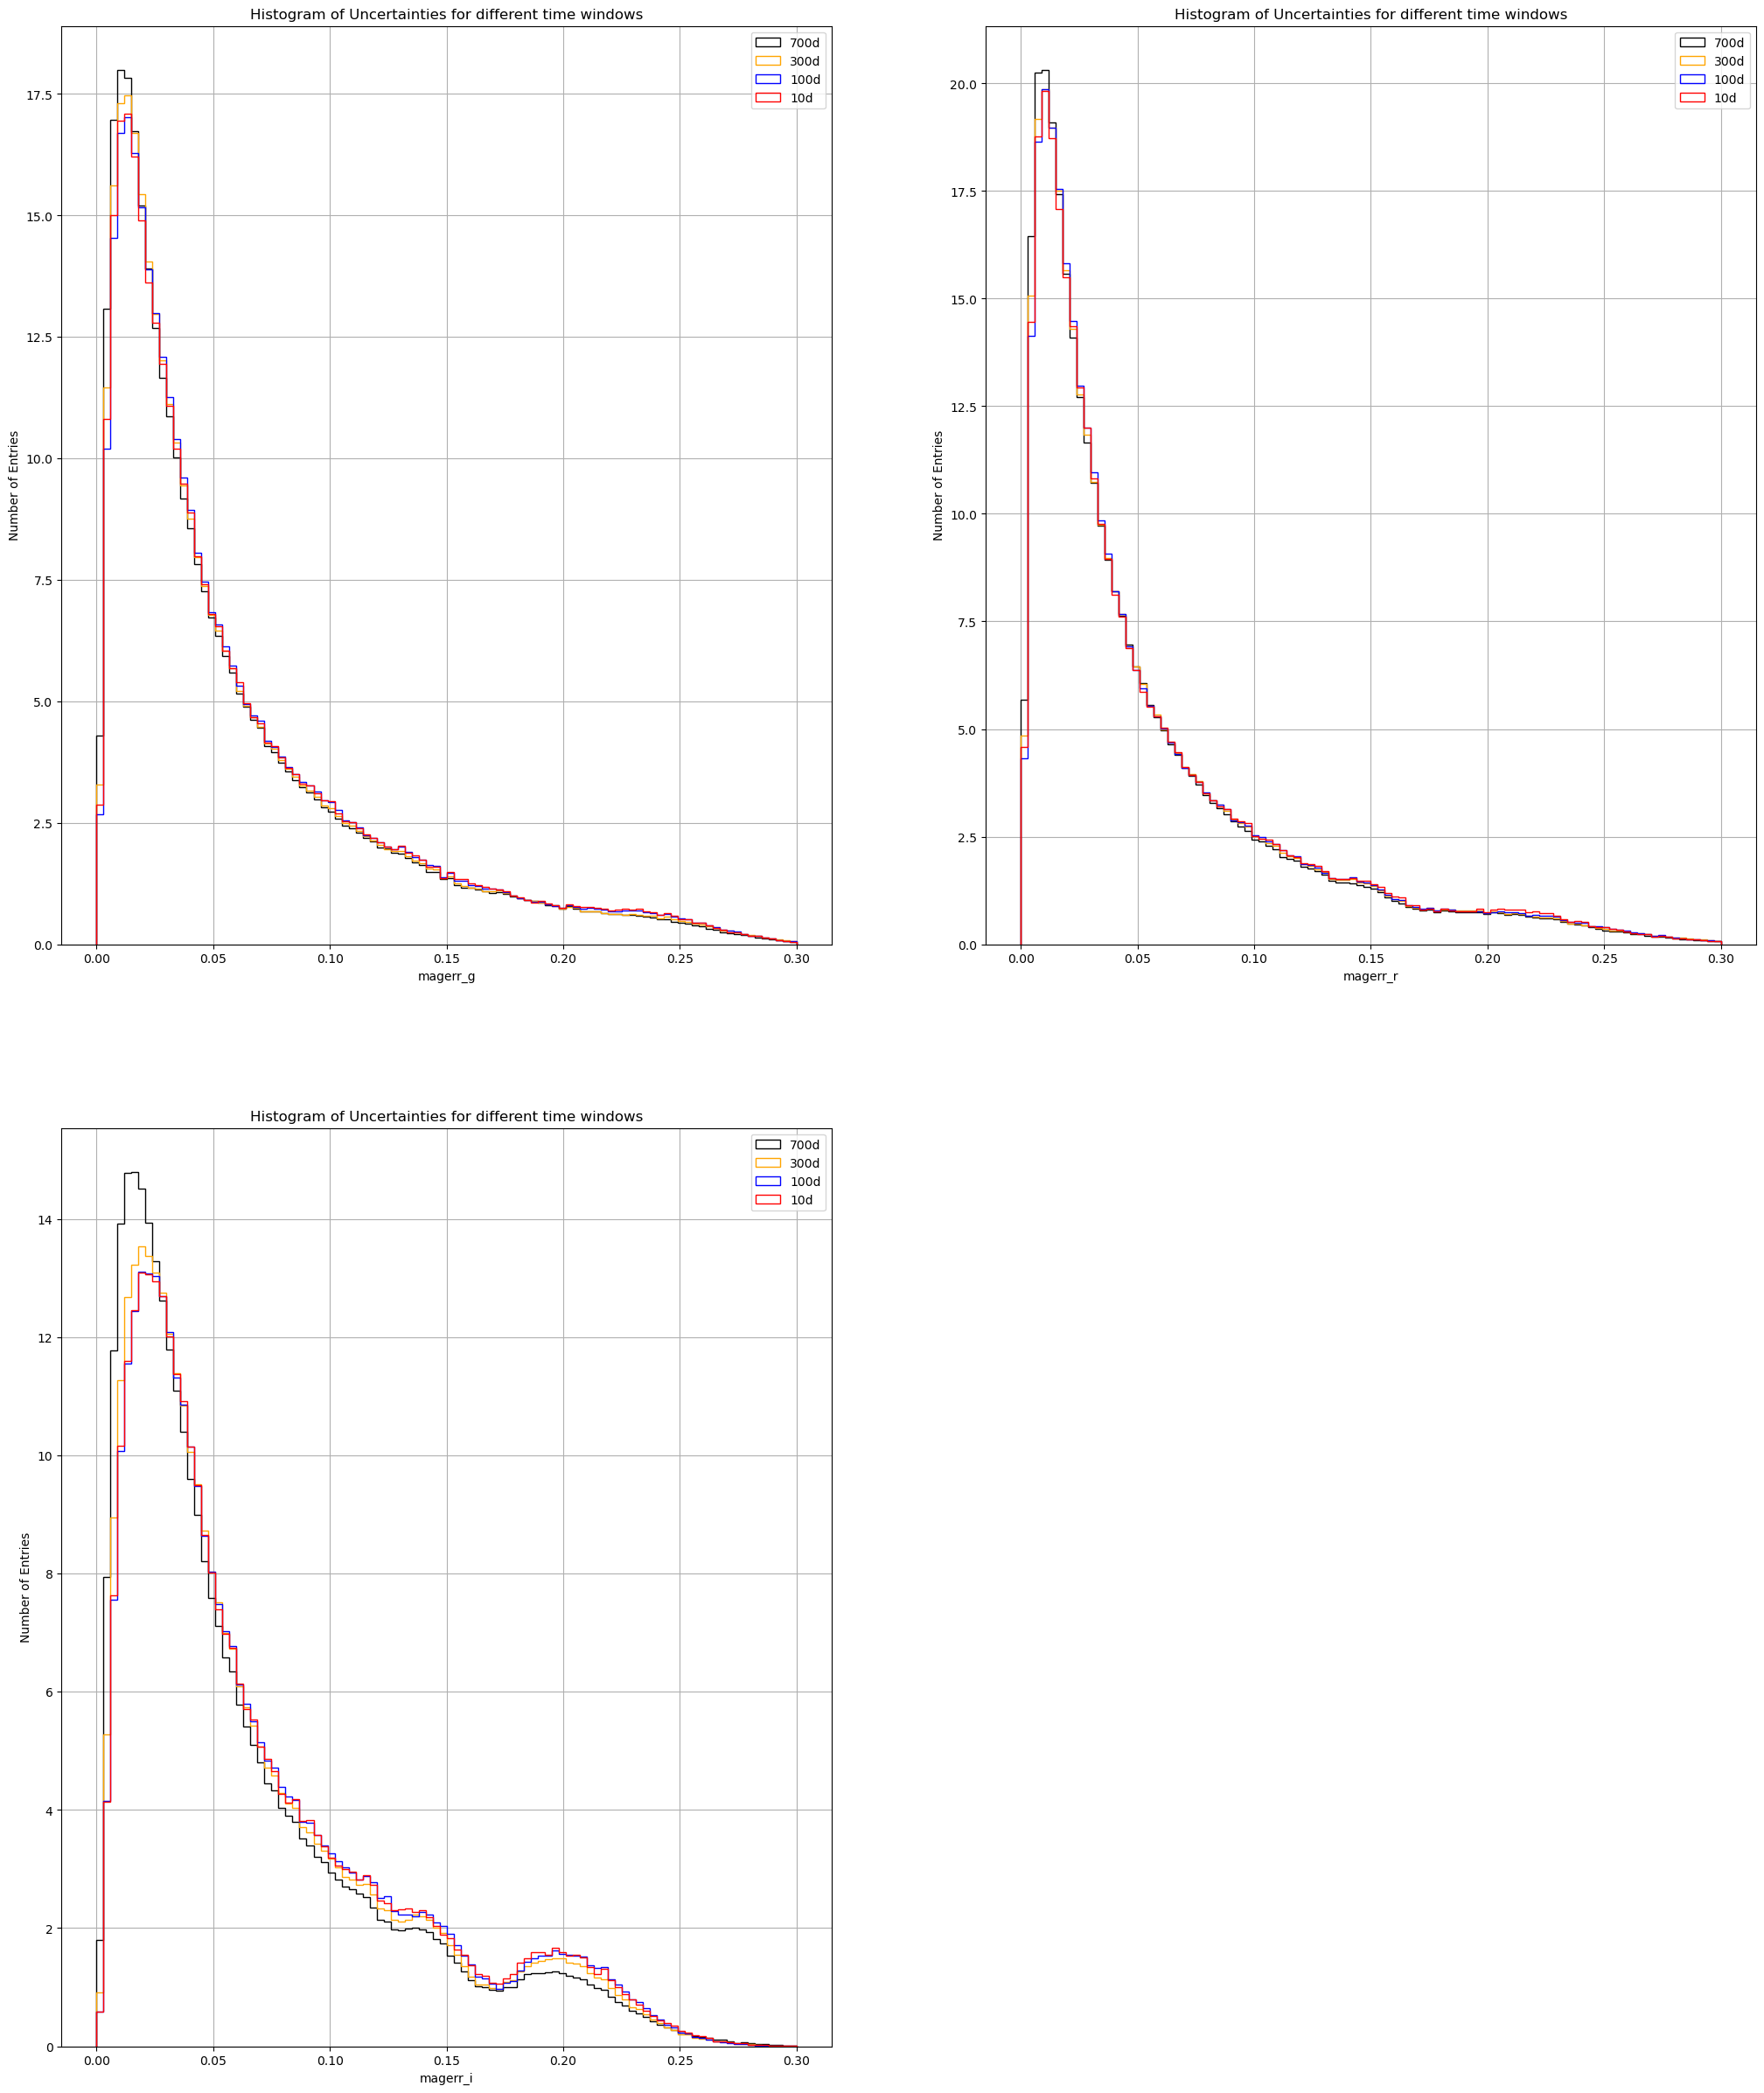

In [10]:
plt.figure(figsize=(25, 30))
plt.subplot(221)
# Create the histogram without filling the bars (histtype='step')
plt.hist(magerr_g_within_700, bins=100, range=(0, 0.3), histtype='step', color='black', label='700d', alpha=1,density=True)
plt.hist(magerr_g_within_300, bins=100, range=(0, 0.3), histtype='step', color='orange', label='300d', alpha=1,density=True)
plt.hist(magerr_g_within_100, bins=100, range=(0, 0.3), histtype='step', color='blue', label='100d', alpha=1,density=True)
plt.hist(magerr_g_within_50, bins=100, range=(0, 0.3), histtype='step', color='red', label='10d', alpha=1,density=True)
# Customize plot labels and appearance
plt.xlabel('magerr_g')
plt.ylabel('Number of Entries')
plt.title('Histogram of Uncertainties for different time windows')
plt.legend()

# Show the plot
plt.grid(True)
plt.subplot(222)

# Create the histogram without filling the bars (histtype='step')
plt.hist(magerr_r_within_700, bins=100, range=(0, 0.3), histtype='step', color='black', label='700d', alpha=1,density=True)
plt.hist(magerr_r_within_300, bins=100, range=(0, 0.3), histtype='step', color='orange', label='300d', alpha=1,density=True)
plt.hist(magerr_r_within_100, bins=100, range=(0, 0.3), histtype='step', color='blue', label='100d', alpha=1,density=True)
plt.hist(magerr_r_within_50, bins=100, range=(0, 0.3), histtype='step', color='red', label='10d', alpha=1,density=True)
# Customize plot labels and appearance
plt.xlabel('magerr_r')
plt.ylabel('Number of Entries')
plt.title('Histogram of Uncertainties for different time windows')
plt.legend()

# Show the plot
plt.grid(True)
plt.subplot(223)

# Create the histogram without filling the bars (histtype='step')
plt.hist(magerr_i_within_700, bins=100, range=(0, 0.3), histtype='step', color='black', label='700d', alpha=1,density=True)
plt.hist(magerr_i_within_300, bins=100, range=(0, 0.3), histtype='step', color='orange', label='300d', alpha=1,density=True)
plt.hist(magerr_i_within_100, bins=100, range=(0, 0.3), histtype='step', color='blue', label='100d', alpha=1,density=True)
plt.hist(magerr_i_within_50, bins=100, range=(0, 0.3), histtype='step', color='red', label='10d', alpha=1,density=True)
# Customize plot labels and appearance
plt.xlabel('magerr_i')
plt.ylabel('Number of Entries')
plt.title('Histogram of Uncertainties for different time windows')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Plot histograms of redshift

## Plot redshifts with uncertainty along the time baseline

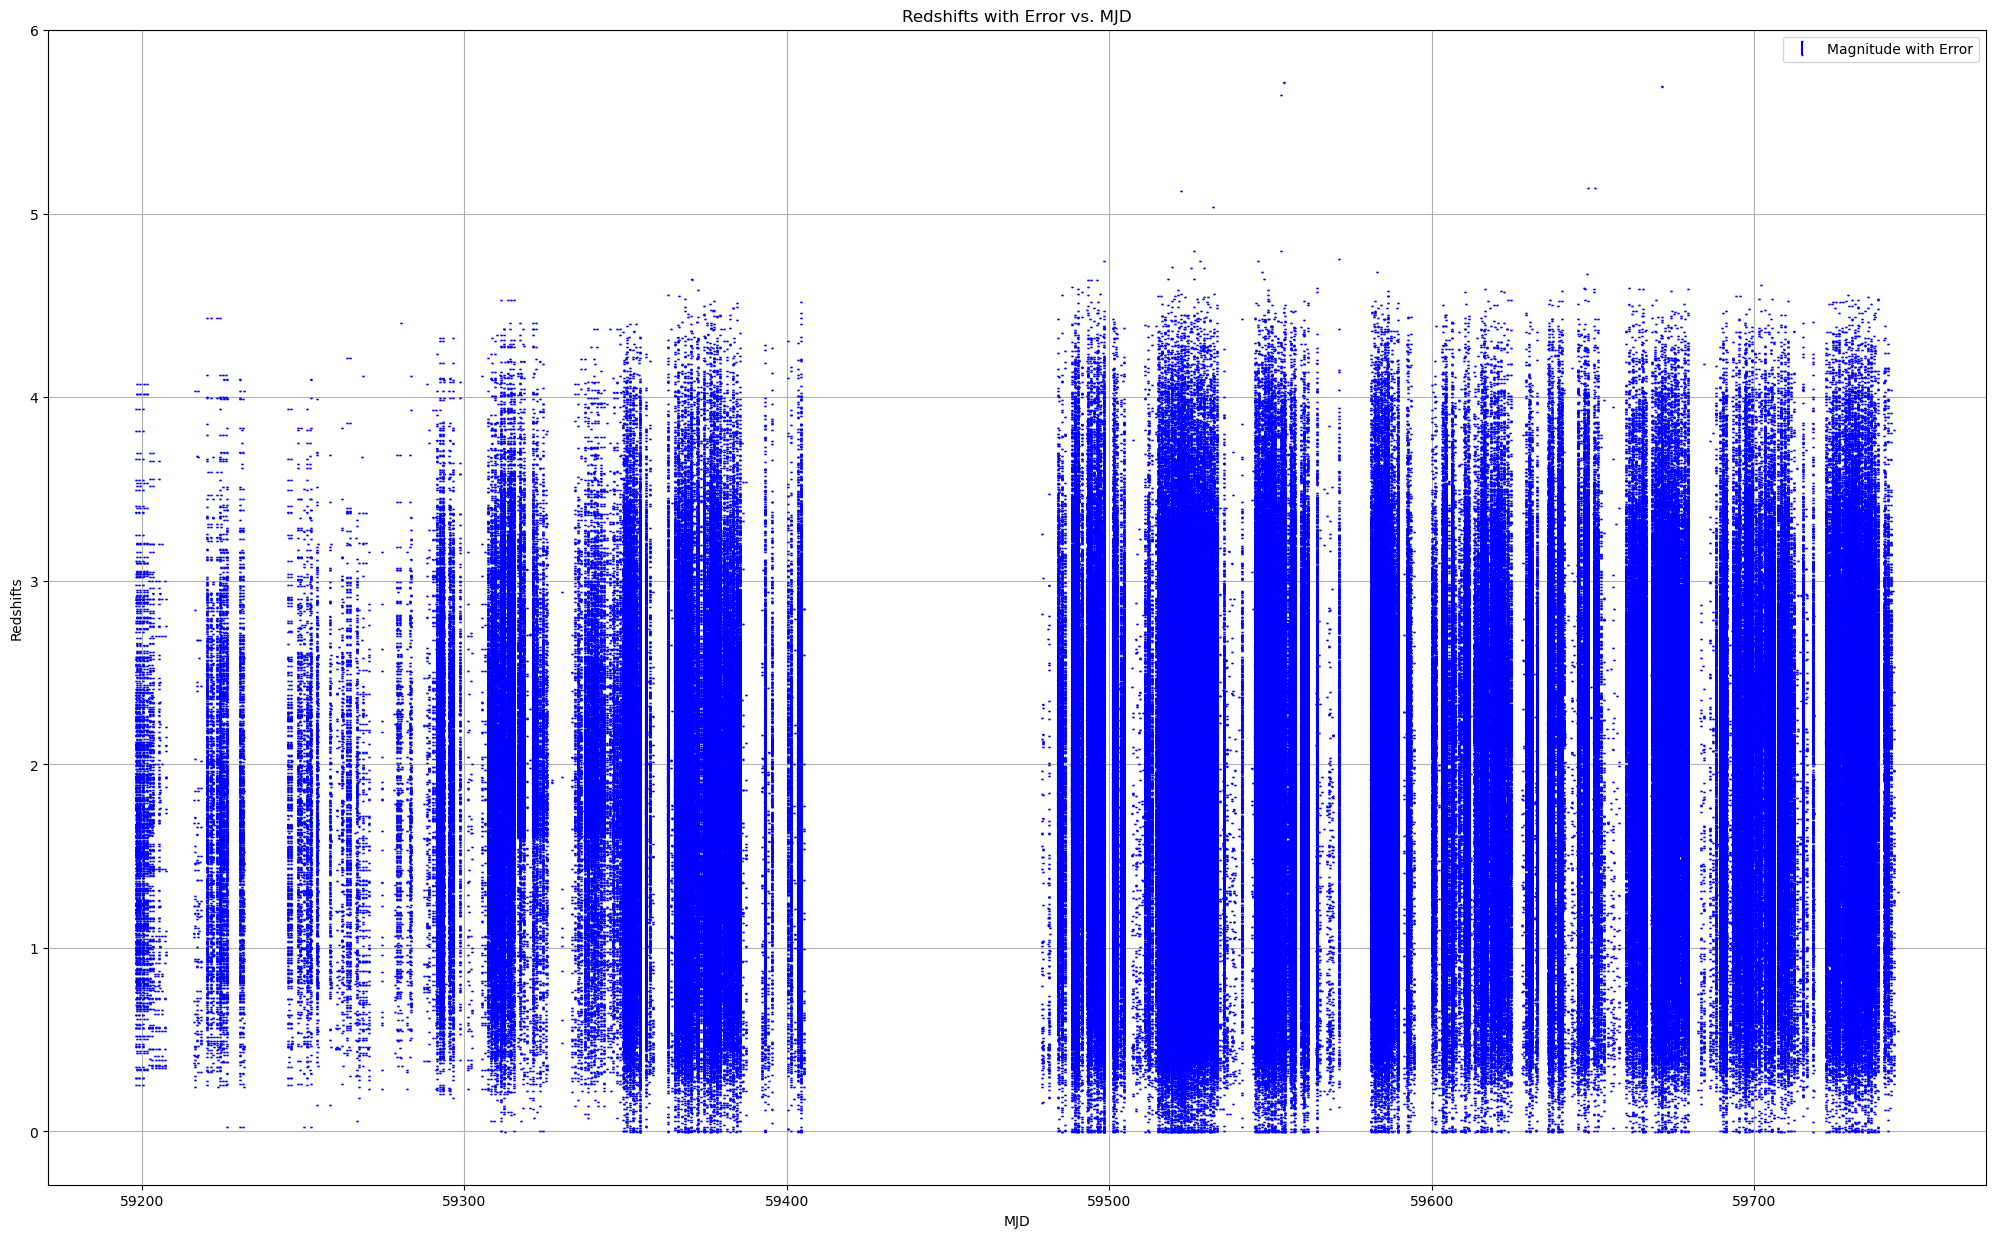

In [11]:
sorted_indices = np.argsort(mjd_sld)
sorted_mjd_sld = mjd_sld[sorted_indices]
sorted_z = z_sld[sorted_indices]
sorted_zerr = zerr_sld[sorted_indices]
sorted_d = d[sorted_indices]

# Create the scatter plot with error bars
plt.figure(figsize=(25, 15))
plt.errorbar(sorted_mjd_sld, sorted_z, yerr=np.abs(sorted_zerr), fmt='o', color='blue', capsize=1, markersize=0.01, label='Magnitude with Error')
# Customize plot labels and appearance
plt.xlabel('MJD')
plt.ylabel('Redshifts')
plt.title('Redshifts with Error vs. MJD')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

## Plot the distribution of redshifts, distance modulus and uncertainties

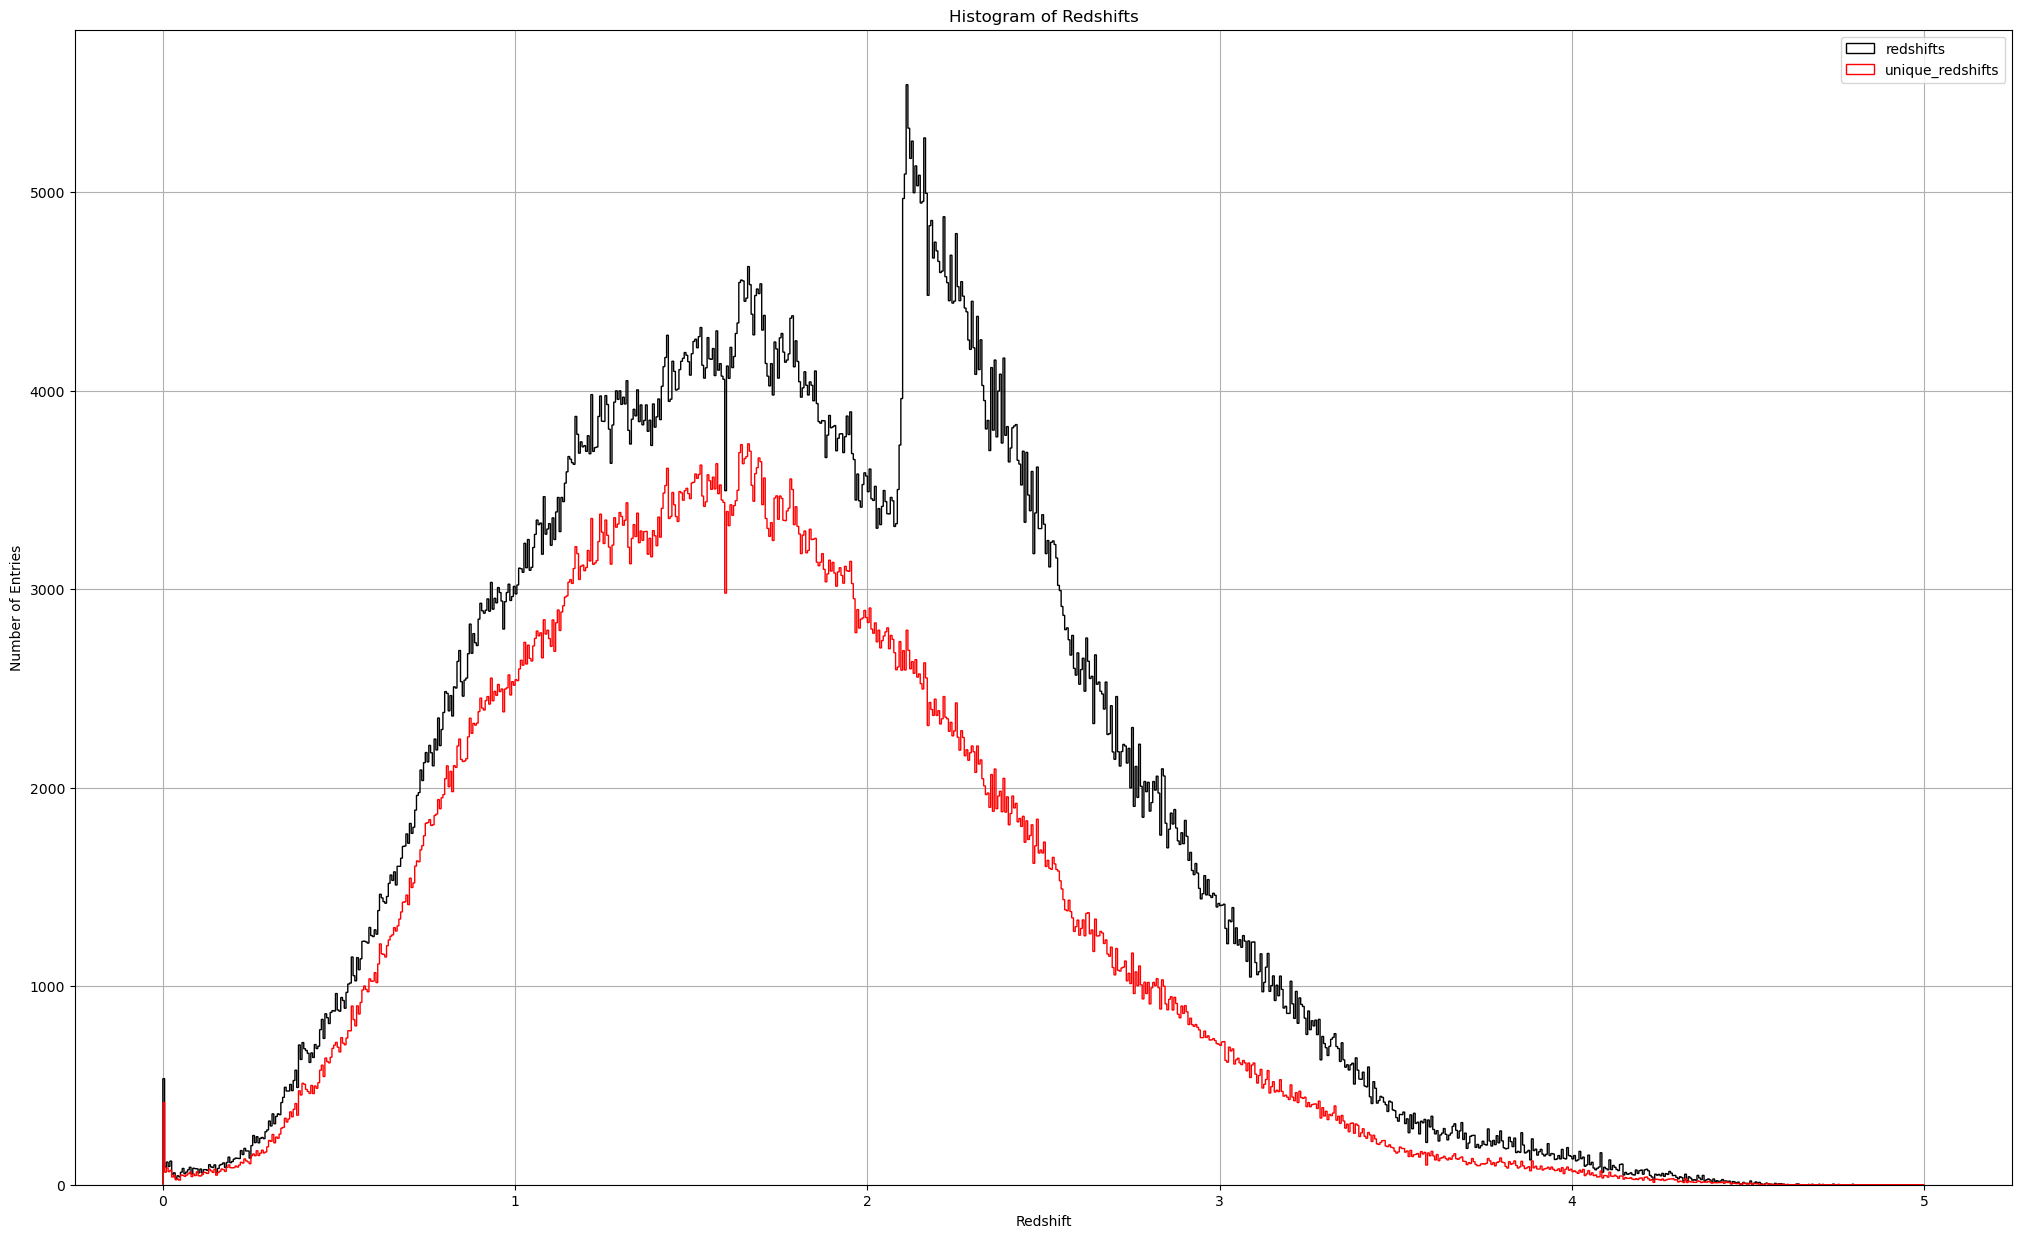

In [12]:
# Create the histogram without filling the bars (histtype='step')
plt.figure(figsize=(25, 15))

plt.hist(z_sld, bins=1000, range=(0, 5), histtype='step', color='black', label='redshifts', alpha=1)
_,ii = np.unique(targetid_sld,return_index=True)
plt.hist(z_sld[ii], bins=1000, range=(0, 5), histtype='step', color='red', label='unique_redshifts', alpha=1)
# Customize plot labels and appearance
plt.xlabel('Redshift')
plt.ylabel('Number of Entries')
plt.title('Histogram of Redshifts')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

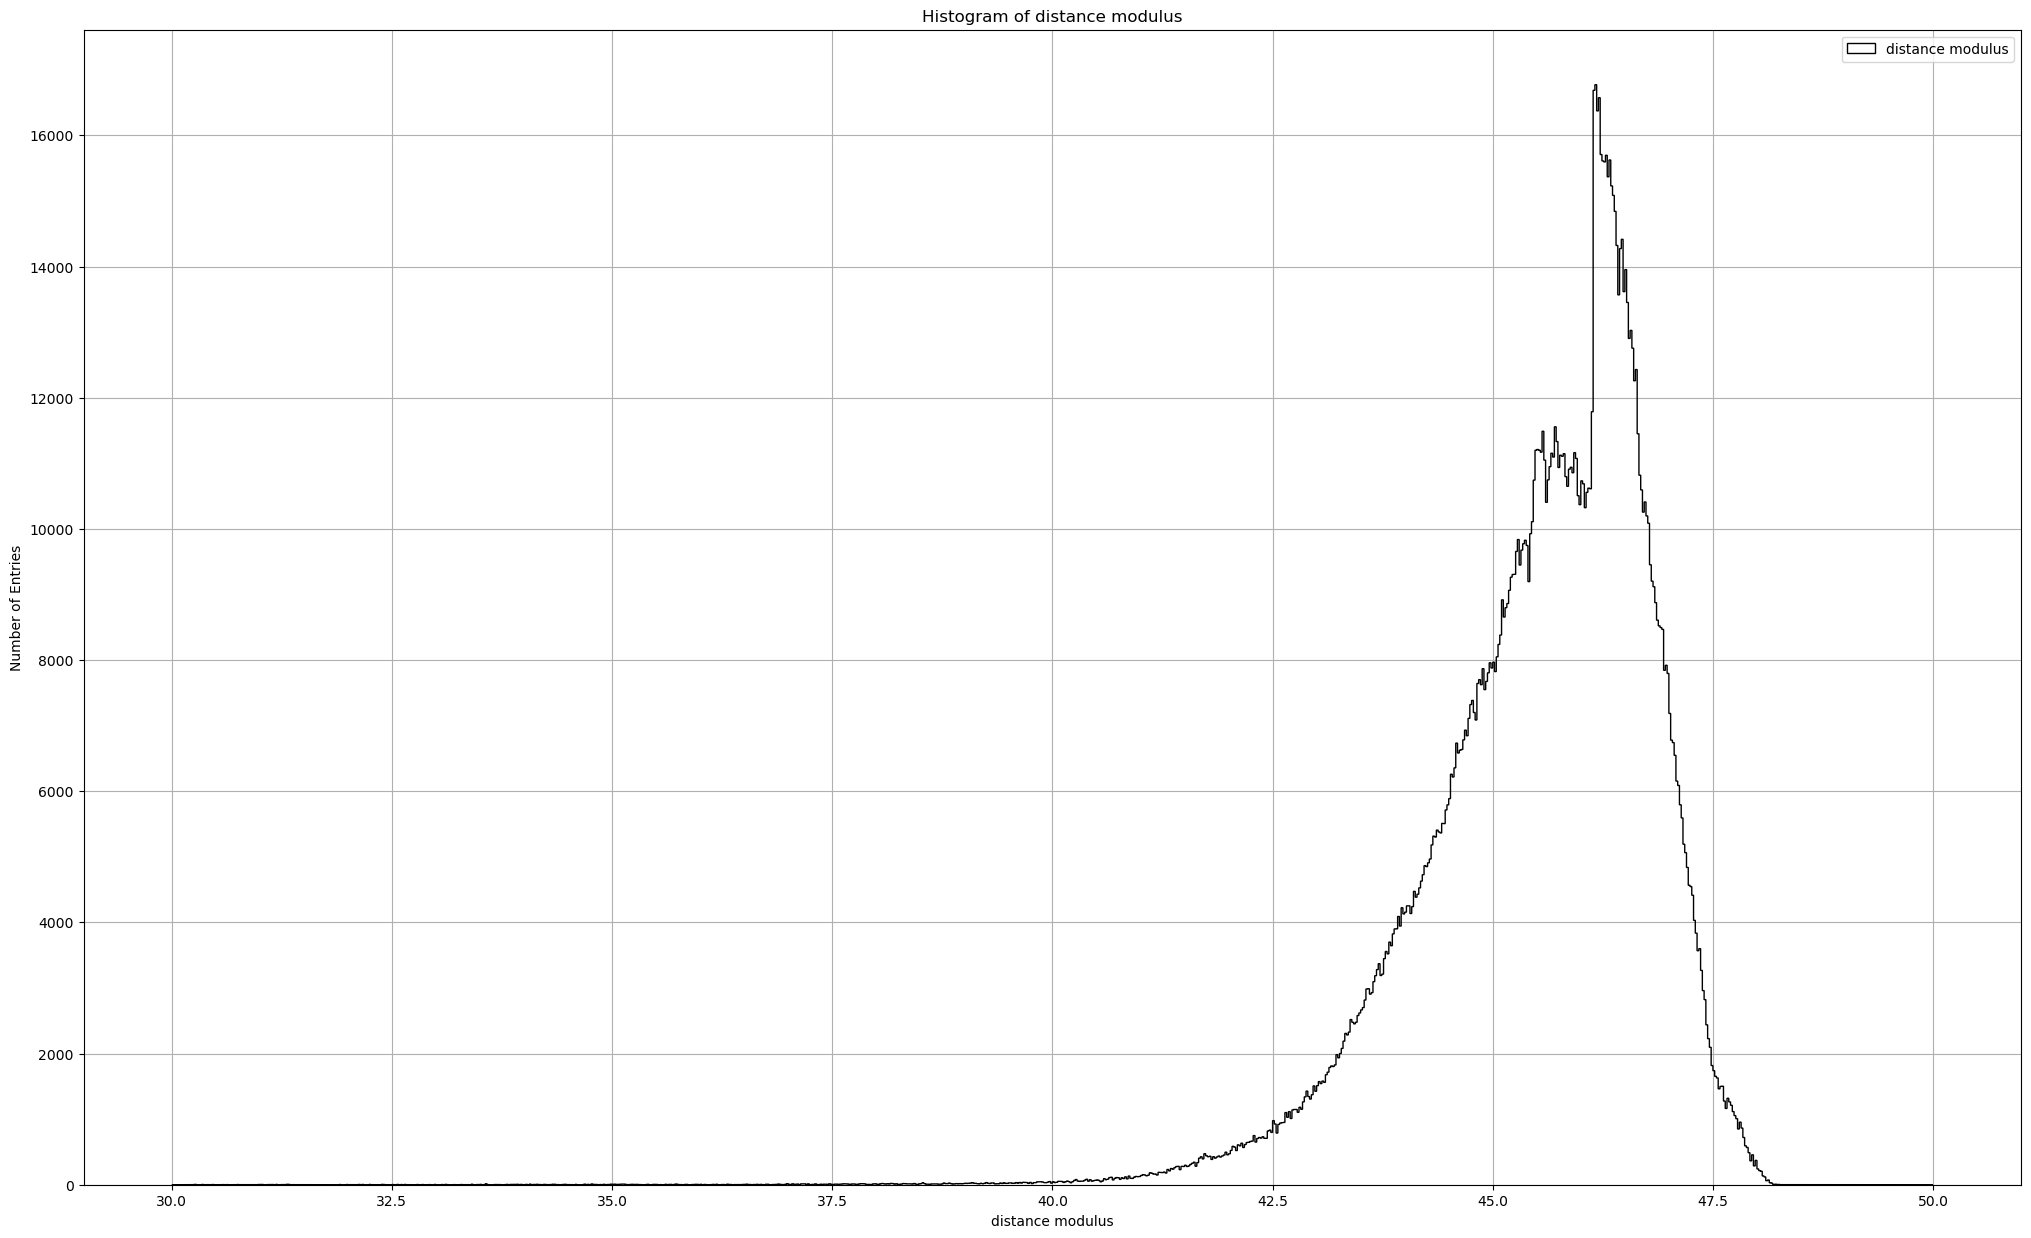

In [13]:
# Create the histogram without filling the bars (histtype='step')
plt.figure(figsize=(25, 15))

plt.hist(d, bins=1000, range=(30, 50), histtype='step', color='black', label='distance modulus', alpha=1)
# Customize plot labels and appearance
plt.xlabel('distance modulus')
plt.ylabel('Number of Entries')
plt.title('Histogram of distance modulus')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

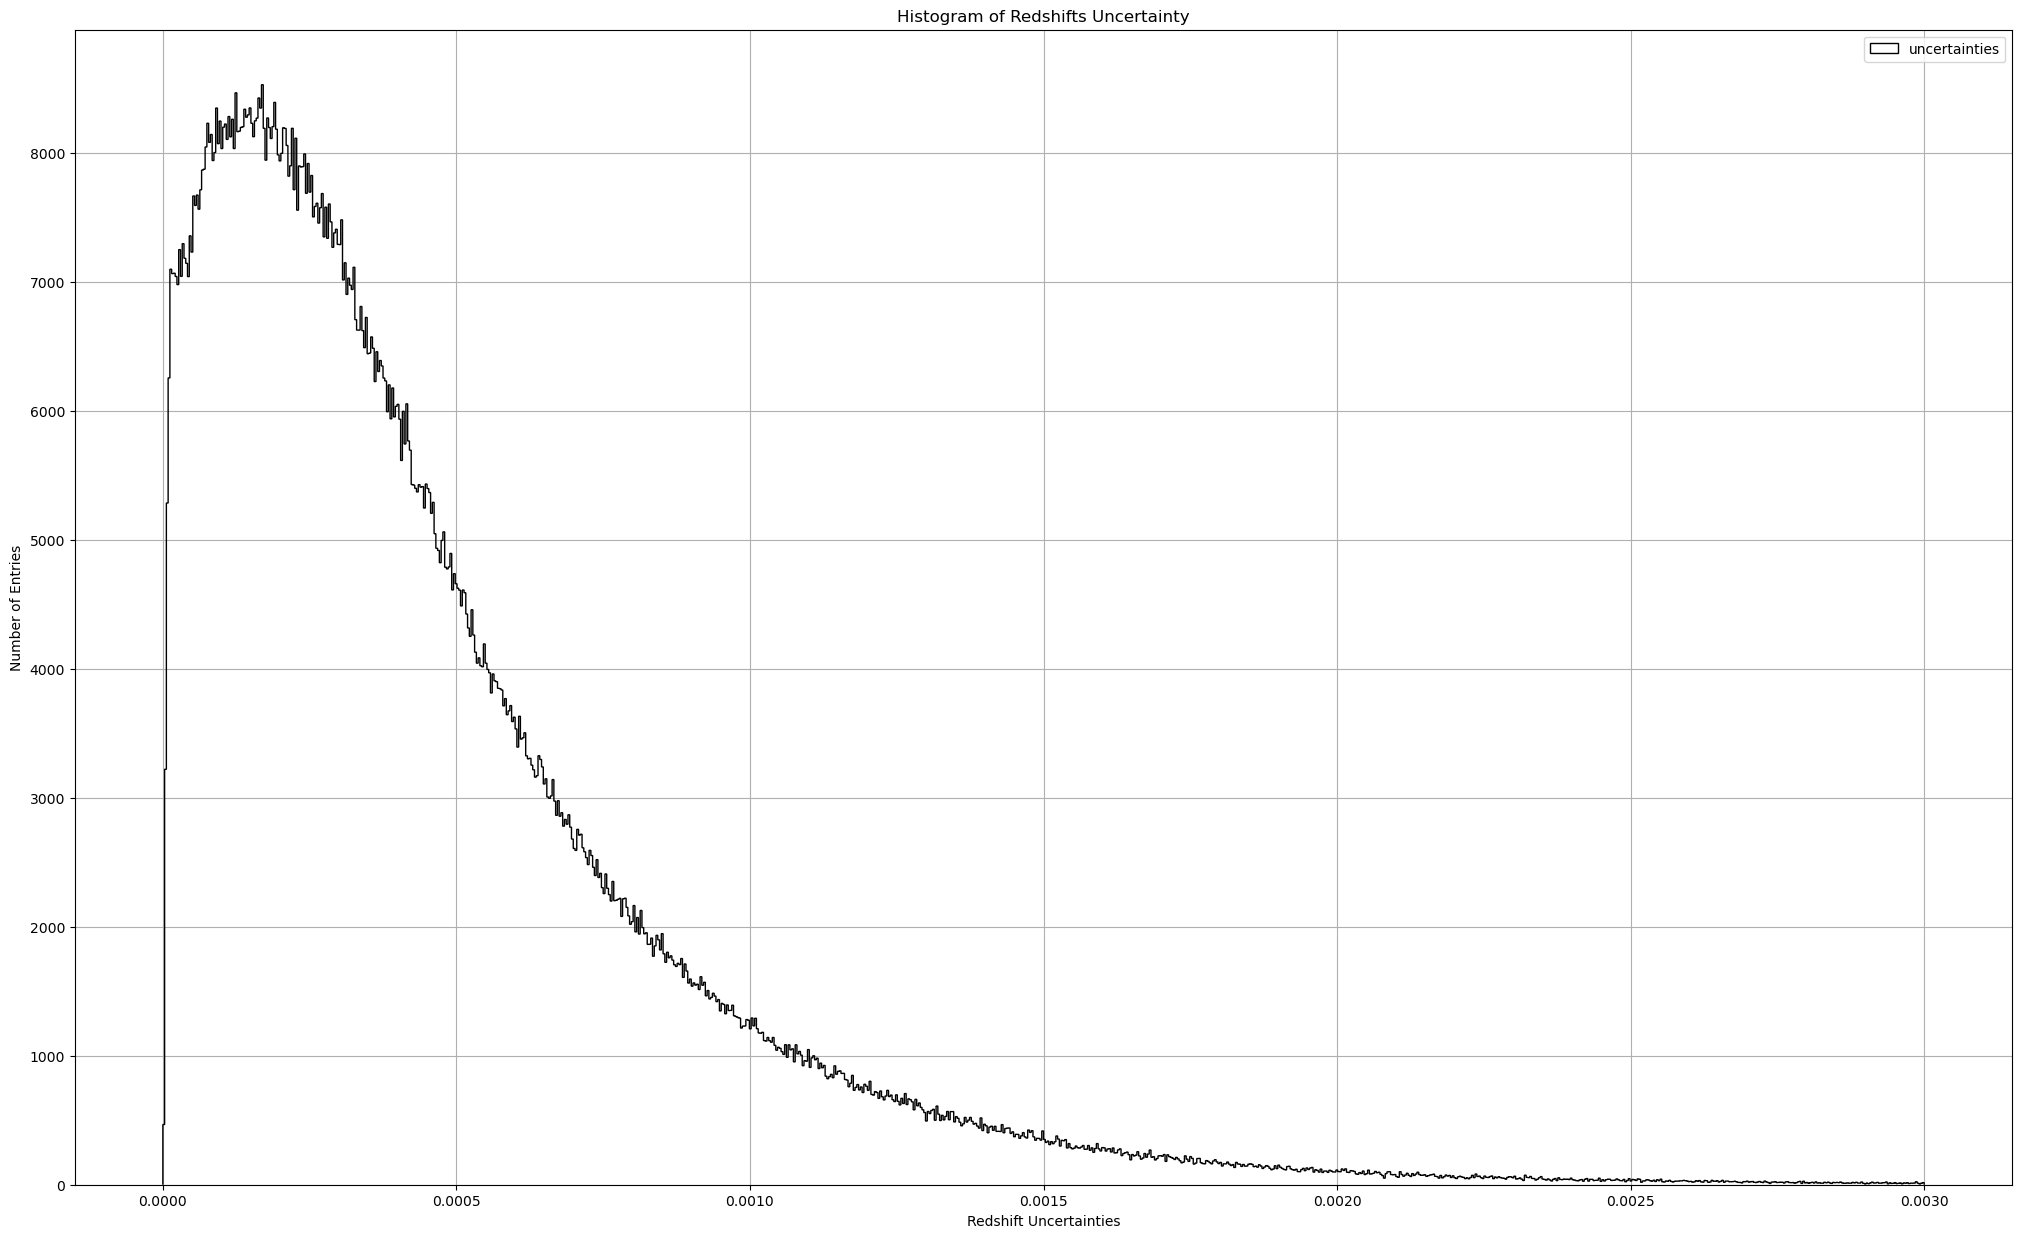

In [14]:
# Create the histogram without filling the bars (histtype='step')
plt.figure(figsize=(25, 15))

plt.hist(zerr_sld, bins=1000, range=(0, 0.003), histtype='step', color='black', label='uncertainties', alpha=1)
# Customize plot labels and appearance
plt.xlabel('Redshift Uncertainties')
plt.ylabel('Number of Entries')
plt.title('Histogram of Redshifts Uncertainty')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

## Plot the histograms of redshifts, distance modulus and uncertainties for different time windows, set the mean of mjd as the DESI observation time

In [15]:
mjd_mean = np.mean(mjd_sld)
def time_window(mjd, window,z,d,zerr):
    start = mjd - window / 2
    end = mjd + window / 2
    indices = (mjd_sld >= start) & (mjd_sld <= end)
    
    z_within_window = z[indices]
    d_within_window = d[indices]
    zerr_within_window = zerr[indices]
    
    return z_within_window, d_within_window, zerr_within_window
z_within_700,d_within_700,zerr_within_700 = time_window(mjd_mean,700,z_sld,d,zerr_sld)
z_within_300,d_within_300,zerr_within_300 = time_window(mjd_mean,300,z_sld,d,zerr_sld)
z_within_100,d_within_100,zerr_within_100 = time_window(mjd_mean,100,z_sld,d,zerr_sld)
z_within_10,d_within_10,zerr_within_10 = time_window(mjd_mean,10,z_sld,d,zerr_sld)

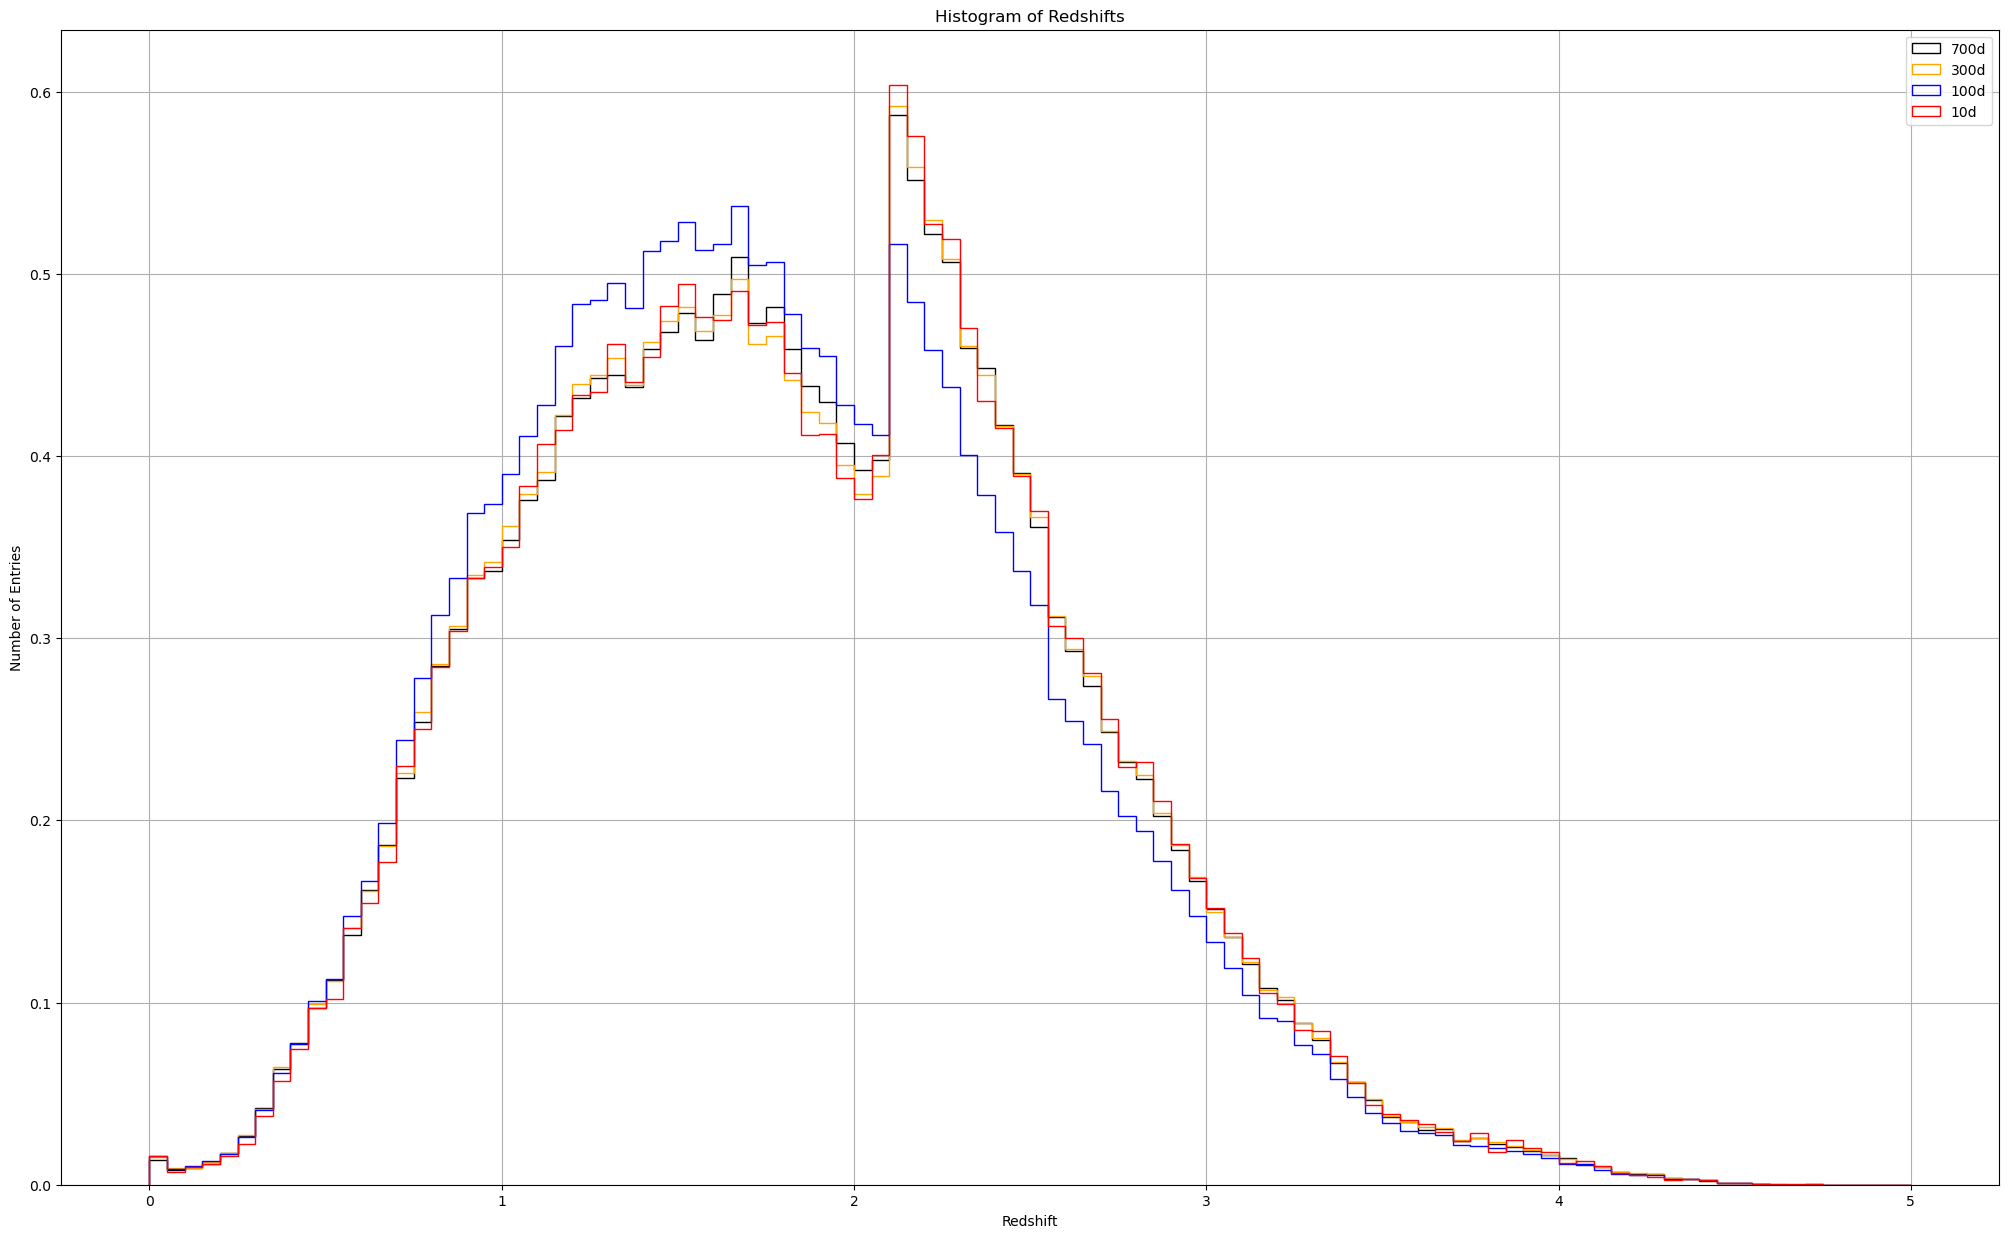

In [16]:
plt.figure(figsize=(25, 15))
# Create the histogram without filling the bars (histtype='step')
plt.hist(z_within_700, bins=100, range=(0, 5), histtype='step', color='black', label='700d', alpha=1,density=True)
plt.hist(z_within_300, bins=100, range=(0, 5), histtype='step', color='orange', label='300d', alpha=1,density=True)
plt.hist(z_within_100, bins=100, range=(0, 5), histtype='step', color='blue', label='100d', alpha=1,density=True)
plt.hist(z_within_10, bins=100, range=(0, 5), histtype='step', color='red', label='10d', alpha=1,density=True)
# Customize plot labels and appearance
plt.xlabel('Redshift')
plt.ylabel('Number of Entries')
plt.title('Histogram of Redshifts')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

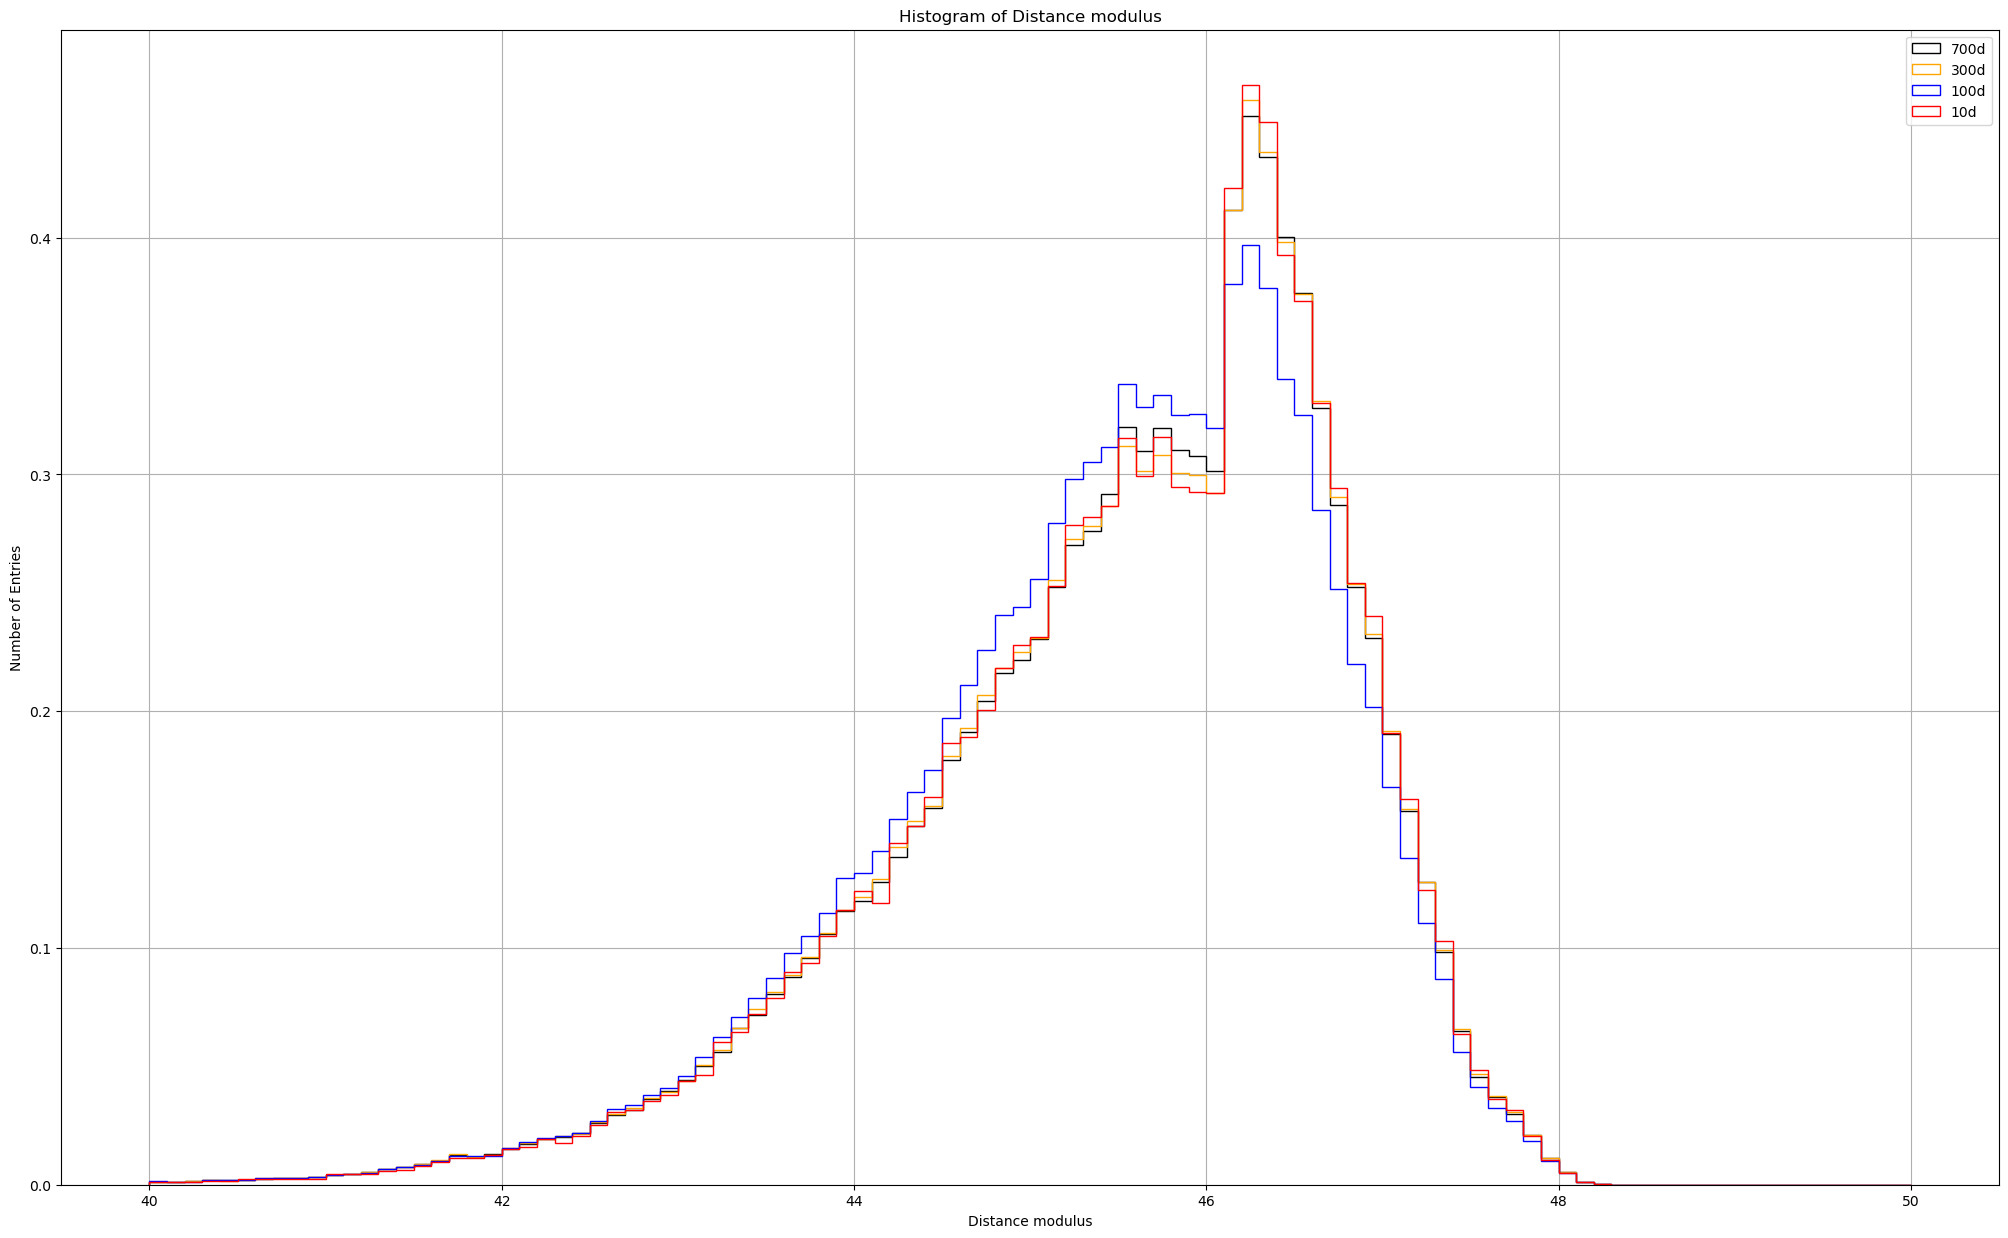

In [17]:
# Create the histogram without filling the bars (histtype='step')
plt.figure(figsize=(25, 15))

plt.hist(d_within_700, bins=100, range=(40, 50), histtype='step', color='black', label='700d', alpha=1,density=True)
plt.hist(d_within_300, bins=100, range=(40, 50), histtype='step', color='orange', label='300d', alpha=1,density=True)
plt.hist(d_within_100, bins=100, range=(40, 50), histtype='step', color='blue', label='100d', alpha=1,density=True)
plt.hist(d_within_10, bins=100, range=(40, 50), histtype='step', color='red', label='10d', alpha=1,density=True)
# Customize plot labels and appearance
plt.xlabel('Distance modulus')
plt.ylabel('Number of Entries')
plt.title('Histogram of Distance modulus')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

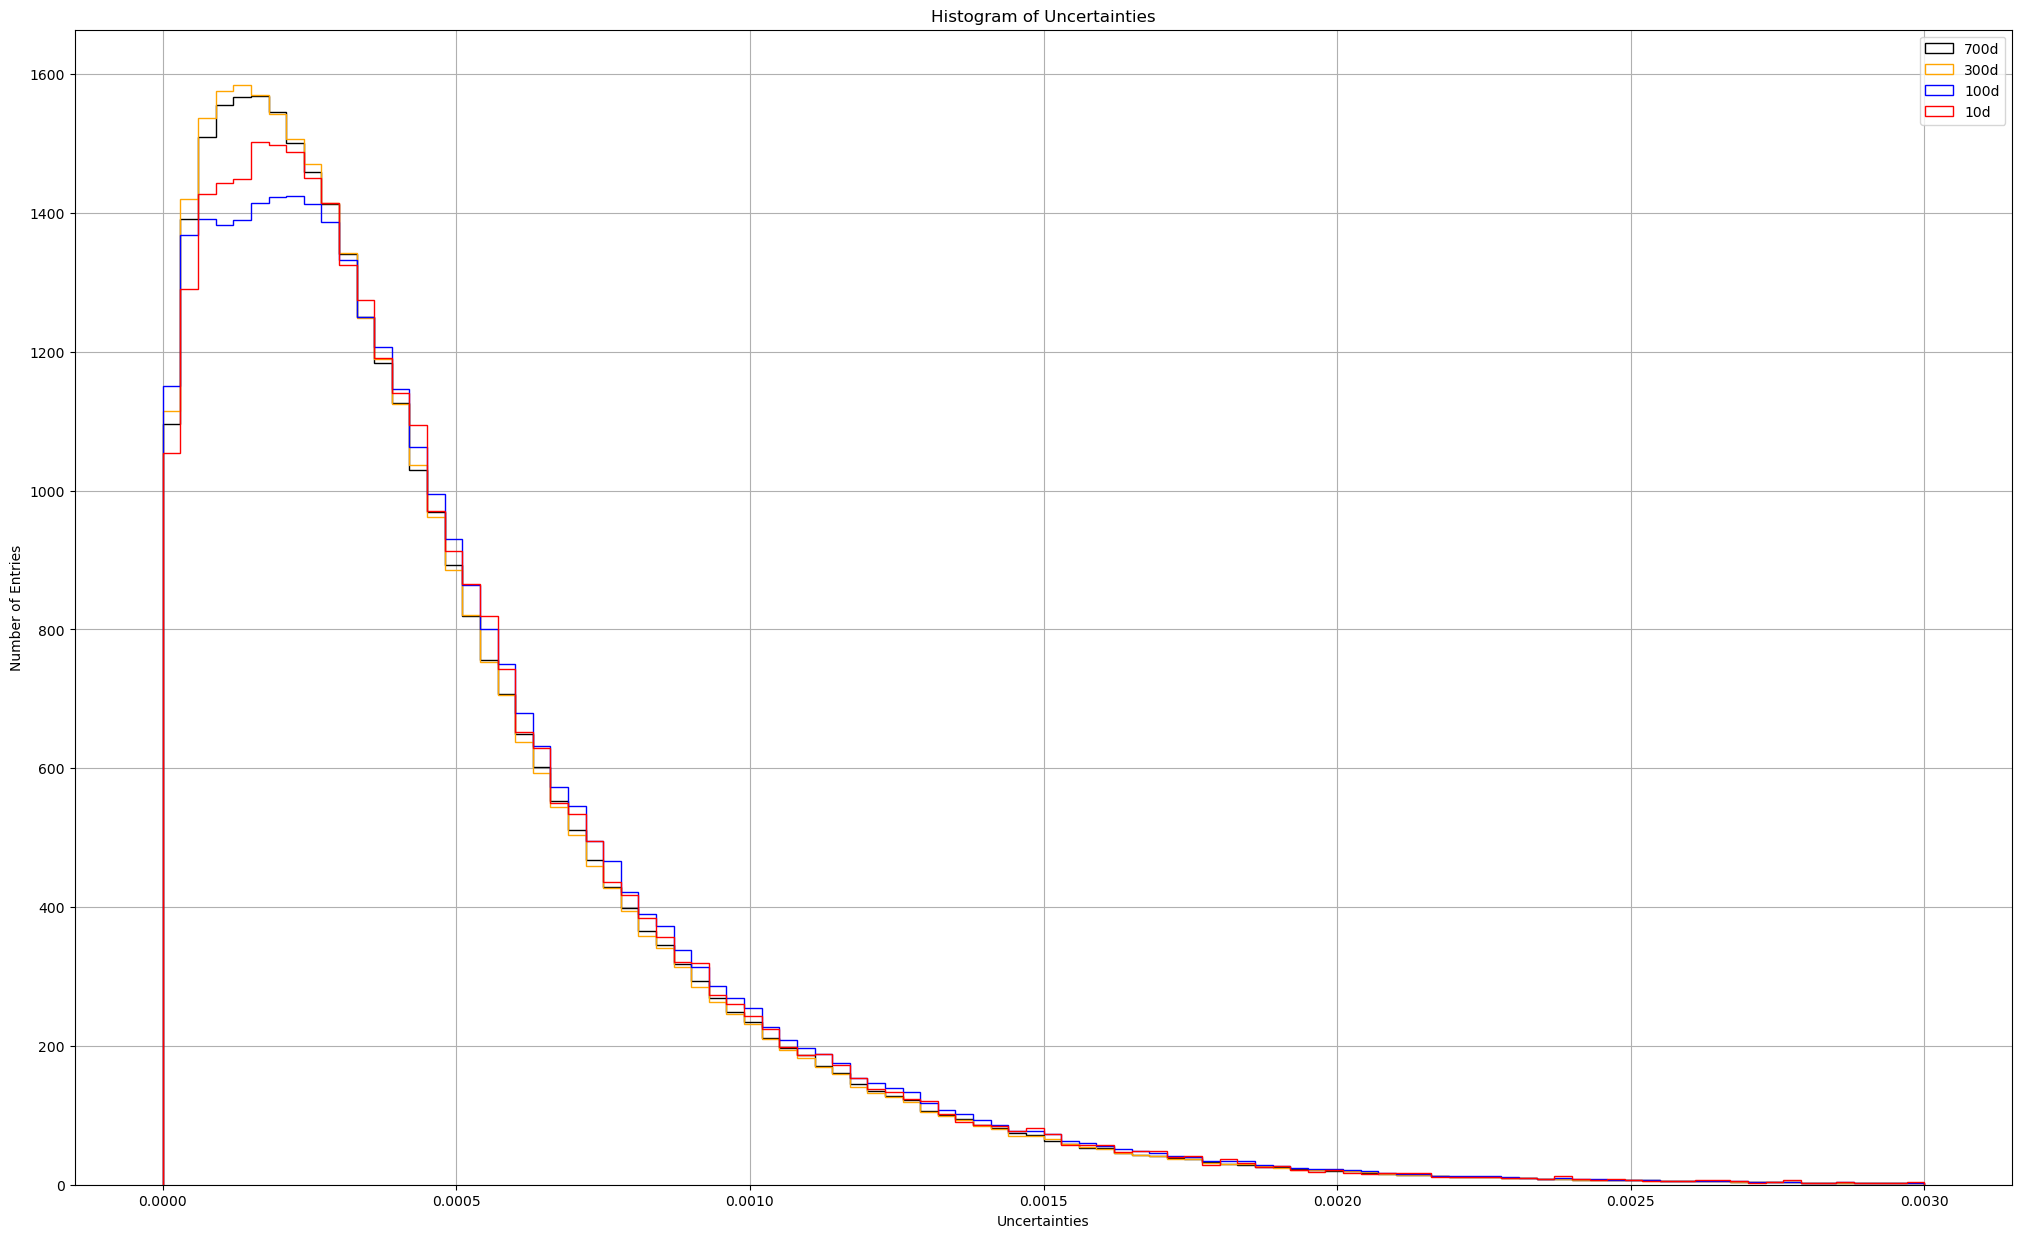

In [18]:
# Create the histogram without filling the bars (histtype='step')
plt.figure(figsize=(25, 15))

plt.hist(zerr_within_700, bins=100, range=(0, 0.003), histtype='step', color='black', label='700d', alpha=1,density=True)
plt.hist(zerr_within_300, bins=100, range=(0, 0.003), histtype='step', color='orange', label='300d', alpha=1,density=True)
plt.hist(zerr_within_100, bins=100, range=(0, 0.003), histtype='step', color='blue', label='100d', alpha=1,density=True)
plt.hist(zerr_within_10, bins=100, range=(0, 0.003), histtype='step', color='red', label='10d', alpha=1,density=True)
# Customize plot labels and appearance
plt.xlabel('Uncertainties')
plt.ylabel('Number of Entries')
plt.title('Histogram of Uncertainties')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Calculate absolute magnitudes of the quasars

In [19]:
from tqdm import tqdm
def calculate_abs_mag(target_ids, mags, z_values, targetid_sld,mjd,magerr):
    #abs_mag = []
    #z = []
    #mjd0 = []
    #derr0 = []
    #magerr0 = []
    #targetid_abs = []
    apr_mag = []
    for index,target_id in tqdm(enumerate(target_ids),total = 1000000):
        if target_id in targetid_sld:
            indice_2 = (targetid_sld == target_id)
            wei_mag = mags[index]
            #mag = wei_mag - d[indice_2][0]
            #abs_mag.append(mag)
            #z.append(z_values[indice_2][0])
            #mjd0.append(mjd[index])
            #derr0.append(derr[indice_2][0])
            #magerr0.append(magerr[index])
            #targetid_abs.append(target_id)
            apr_mag.append(wei_mag)
            #print((target_ids[index]))
            #print(targetid_sld[indice_2][0])
            #print(z_values[indice_2][0])
    return apr_mag#targetid_abs ,abs_mag, z,mjd0,derr0,magerr0

In [20]:
#targetid_abs_g,abs_mag_g, z_g,mjd_g_1,derr_g,magerr_g_1 = calculate_abs_mag(target_id_g, mag_g, z_sld, targetid_sld,mjd_g,magerr_g)
apr_mag_g = calculate_abs_mag(target_id_g, mag_g, z_sld, targetid_sld,mjd_g,magerr_g)
'''
np.save('/global/u1/z/zhaozhon/Dataset/targetid_abs_g.npy',targetid_abs_g)
np.save('/global/u1/z/zhaozhon/Dataset/abs_mag_g.npy', abs_mag_g)
np.save('/global/u1/z/zhaozhon/Dataset/z_g.npy', z_g)
np.save('/global/u1/z/zhaozhon/Dataset/mjd_g_1.npy', mjd_g_1)
np.save('/global/u1/z/zhaozhon/Dataset/derr_g.npy', derr_g)
np.save('/global/u1/z/zhaozhon/Dataset/magerr_g_1.npy', magerr_g_1)
'''
#np.save('apr_mag_g.npy', apr_mag_g)

 97%|█████████▋| 972489/1000000 [05:41<00:09, 2844.14it/s]


In [21]:
#targetid_abs_r,abs_mag_r, z_r,mjd_r_1,derr_r,magerr_r_1 = calculate_abs_mag(target_id_r, mag_r, z_sld, targetid_sld,mjd_r,magerr_r)
apr_mag_r = calculate_abs_mag(target_id_r, mag_r, z_sld, targetid_sld,mjd_r,magerr_r)
'''
np.save('/global/u1/z/zhaozhon/Dataset/targetid_abs_r.npy',targetid_abs_r)
np.save('/global/u1/z/zhaozhon/Dataset/abs_mag_r.npy', abs_mag_r)
np.save('/global/u1/z/zhaozhon/Dataset/z_r.npy', z_r)
np.save('/global/u1/z/zhaozhon/Dataset/mjd_r_1.npy', mjd_r_1)
np.save('/global/u1/z/zhaozhon/Dataset/derr_r.npy', derr_r)
np.save('/global/u1/z/zhaozhon/Dataset/magerr_r_1.npy', magerr_r_1)
'''
#np.save('apr_mag_r.npy', apr_mag_r)

1122111it [05:51, 3196.27it/s]                            


In [22]:
#targetid_abs_i,abs_mag_i, z_i,mjd_i_1,derr_i,magerr_i_1 = calculate_abs_mag(target_id_i, mag_i, z_sld, targetid_sld,mjd_i,magerr_i)
apr_mag_i = calculate_abs_mag(target_id_i, mag_i, z_sld, targetid_sld,mjd_i,magerr_i)
'''
np.save('/global/u1/z/zhaozhon/Dataset/targetid_abs_i.npy',targetid_abs_i)
np.save('/global/u1/z/zhaozhon/Dataset/abs_mag_i.npy', abs_mag_i)
np.save('/global/u1/z/zhaozhon/Dataset/z_i.npy', z_i)
np.save('/global/u1/z/zhaozhon/Dataset/mjd_i_1.npy', mjd_i_1)
np.save('/global/u1/z/zhaozhon/Dataset/derr_i.npy', derr_i)
np.save('/global/u1/z/zhaozhon/Dataset/magerr_i_1.npy', magerr_i_1)
'''
#np.save('apr_mag_i.npy', apr_mag_i)

 71%|███████▏  | 713235/1000000 [03:40<01:28, 3231.75it/s]


In [23]:
print(len(targetid_abs_g))
print(len(abs_mag_i))
print(len(z_i))
print(len(mjd_i_1))
print(len(derr_i))
print(len(magerr_i_1))

NameError: name 'targetid_abs_g' is not defined